In [9]:
import numpy as np
import pandas as pd
import scipy
from scipy.io import loadmat
import pickle
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm

In [10]:
def num2vec(label, bin_range, bin_step=1, std=1):

    bin_start = bin_range[0]
    bin_end = bin_range[1]
    bin_length = bin_end - bin_start
    if bin_length % bin_step != 0:
        print("Error: Bin range should be divisible by the bin step!")
        return None
    bin_number = int(bin_length / bin_step)
    bin_centers = bin_start + bin_step/2.0 + bin_step * np.arange(bin_number)
    
    if std == 0:
        # Uniform Distribution Case
        label = np.array(label)
        bin_values = np.floor((label - bin_start)/bin_step).astype(int)
    elif std < 0:
        print("Error! The standard deviation (& variance) must be positive")
        return None
    else:
        bin_values = np.zeros((bin_number))
        for i in range(bin_number):
            x1 = bin_centers[i] - bin_step/2.0
            x2 = bin_centers[i] + bin_step/2.0
            cdfs = norm.cdf([x1, x2], loc=label, scale=std)
            bin_values[i] = cdfs[1] - cdfs[0]       

    return bin_values, bin_centers

In [11]:
label = 65
bin_range = [39,89]
std = 10
x, bin_centers = num2vec(label=label, bin_range=bin_range, std=std)

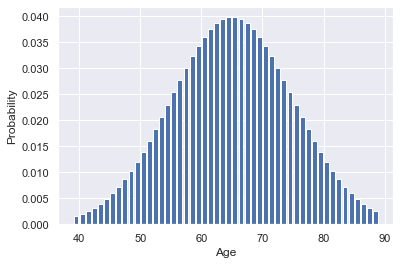

In [12]:
plt.bar(bin_centers, x)
# plt.axvline(x=female_train_age[0], ymin=0, ymax=1, c='r', ls='--')
plt.xlabel("Age")
plt.ylabel('Probability')
plt.show()


In [13]:
label = 65
bin_range = [39,89]
std = 1
x, bin_centers = num2vec(label=label, bin_range=bin_range, std=std)

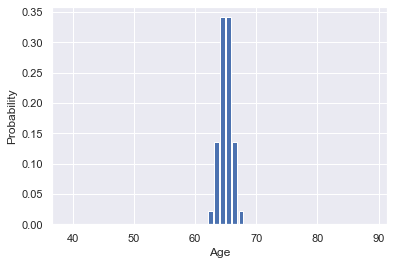

In [14]:
plt.bar(bin_centers, x)
# plt.axvline(x=female_train_age[0], ymin=0, ymax=1, c='r', ls='--')
plt.xlabel("Age")
plt.ylabel('Probability')
plt.show()
plt.show()